In [ ]:
import pandas_datareader as pdr

In [119]:
key = '2b3a67141d7de598aa4698a368faaf2ef16400b5'
df = pdr.get_data_tiingo("AAPL", api_key=key)

In [120]:
df.to_csv('datas/AAPL.csv')

In [121]:
import pandas as pd

In [122]:
df = pd.read_csv('datas/AAPL.csv')

In [123]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-08-18 00:00:00+00:00,462.25,464.000,456.0300,457.410,26408385,462.25,464.000,456.0300,457.410,26408385,0.0,1.0
1253,AAPL,2020-08-19 00:00:00+00:00,462.83,468.650,462.4400,463.933,36384502,462.83,468.650,462.4400,463.933,36384502,0.0,1.0
1254,AAPL,2020-08-20 00:00:00+00:00,473.10,473.568,462.9335,463.000,31726797,473.10,473.568,462.9335,463.000,31726797,0.0,1.0
1255,AAPL,2020-08-21 00:00:00+00:00,497.48,499.472,477.0000,477.050,84513660,497.48,499.472,477.0000,477.050,84513660,0.0,1.0
1256,AAPL,2020-08-24 00:00:00+00:00,503.43,515.140,495.7450,514.790,85834847,503.43,515.140,495.7450,514.790,85834847,0.0,1.0


In [124]:
df1 = df.reset_index()['close']

In [125]:
df1.shape

(1257,)

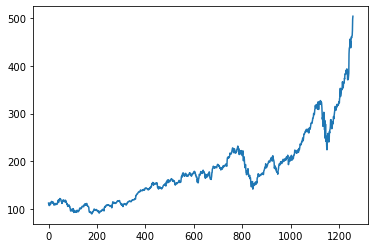

In [129]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [130]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0, 1))
df1=scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [131]:
df1.shape

(1257, 1)

In [183]:
 df1

array([[0.05466121],
       [0.0555569 ],
       [0.05427389],
       ...,
       [0.92657774],
       [0.98559636],
       [1.        ]])

In [184]:
### splitting dataset into train and test
training_size=int(len(df1)*0.90)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size],df1[training_size:len(df1)]

In [198]:
print(training_size)
print(test_size)

1131
126


In [199]:
import numpy as np

def create_dataset(data_set, time_step=1):
    data_x, data_y = [], []
    for i in range(len(data_set)-time_step):
        data_x.append(data_set[i:(i+time_step)])
        data_y.append(data_set[i+time_step])
    return np.array(data_x), np.array(data_y)

In [200]:
time_step = 100
train_x, train_y = create_dataset(train_data, time_step)
test_x, test_y = create_dataset(test_data, time_step)

In [201]:
print(train_x.shape)
print(train_y.shape)

(1031, 100, 1)
(1031, 1)


In [203]:
print(test_x.shape)
print(test_y.shape)

(26, 100, 1)
(26, 1)


In [204]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [205]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [206]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [207]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [208]:
model.fit(train_x, train_y,
          validation_data=(test_x, test_y),
          epochs=100,
          batch_size=64,
          verbose=1)

Epoch 1/100
17/17 [==============================] - 2s 120ms/step - loss: 0.0166 - val_loss: 0.1355
Epoch 2/100
17/17 [==============================] - 1s 79ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 3/100
17/17 [==============================] - 1s 75ms/step - loss: 6.9192e-04 - val_loss: 0.0034
Epoch 4/100
17/17 [==============================] - 1s 87ms/step - loss: 5.1161e-04 - val_loss: 0.0037
Epoch 5/100
17/17 [==============================] - 1s 88ms/step - loss: 3.8722e-04 - val_loss: 0.0071
Epoch 6/100
17/17 [==============================] - 1s 86ms/step - loss: 3.6770e-04 - val_loss: 0.0062
Epoch 7/100
17/17 [==============================] - 1s 84ms/step - loss: 3.6372e-04 - val_loss: 0.0067
Epoch 8/100
17/17 [==============================] - 1s 83ms/step - loss: 3.4390e-04 - val_loss: 0.0046
Epoch 9/100
17/17 [==============================] - 1s 72ms/step - loss: 3.3748e-04 - val_loss: 0.0079
Epoch 10/100
17/17 [==============================] - 1s 75ms/step - lo

17/17 [==============================] - 1s 70ms/step - loss: 1.1601e-04 - val_loss: 0.0035
Epoch 80/100
17/17 [==============================] - 1s 70ms/step - loss: 1.2002e-04 - val_loss: 0.0033
Epoch 81/100
17/17 [==============================] - 1s 71ms/step - loss: 1.1869e-04 - val_loss: 0.0044
Epoch 82/100
17/17 [==============================] - 1s 71ms/step - loss: 1.1221e-04 - val_loss: 0.0037
Epoch 83/100
17/17 [==============================] - 1s 71ms/step - loss: 1.1091e-04 - val_loss: 0.0031
Epoch 84/100
17/17 [==============================] - 1s 72ms/step - loss: 1.3836e-04 - val_loss: 0.0028
Epoch 85/100
17/17 [==============================] - 1s 71ms/step - loss: 1.2144e-04 - val_loss: 0.0077
Epoch 86/100
17/17 [==============================] - 1s 70ms/step - loss: 2.1683e-04 - val_loss: 0.0110
Epoch 87/100
17/17 [==============================] - 1s 71ms/step - loss: 1.1832e-04 - val_loss: 0.0082
Epoch 88/100
17/17 [==============================] - 1s 69ms/step -

In [209]:
train_predict=model.predict(train_x)
test_predict=model.predict(test_x)

In [210]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [217]:
train_predict.shape

(1031, 1)

In [218]:
test_predict.shape

(26, 1)

In [228]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

print(math.sqrt(mean_squared_error(scaler.inverse_transform(train_y), train_predict)))
print(math.sqrt(mean_squared_error(scaler.inverse_transform(test_y), test_predict)))

4.328422071034392
20.43259469851148


In [229]:
scaler.inverse_transform(test_y)

array([[393.43],
       [388.  ],
       [389.09],
       [371.38],
       [370.46],
       [379.24],
       [373.01],
       [380.16],
       [384.76],
       [425.04],
       [435.75],
       [438.66],
       [440.25],
       [455.61],
       [444.45],
       [450.91],
       [437.5 ],
       [452.04],
       [460.04],
       [459.63],
       [458.43],
       [462.25],
       [462.83],
       [473.1 ],
       [497.48],
       [503.43]])

In [230]:
test_predict

array([[387.5261 ],
       [386.9439 ],
       [386.80536],
       [386.90414],
       [382.05798],
       [373.6492 ],
       [367.57755],
       [364.10135],
       [365.16458],
       [370.71625],
       [389.31644],
       [417.62943],
       [445.62262],
       [464.1076 ],
       [473.61285],
       [470.81238],
       [461.23804],
       [446.14145],
       [435.63083],
       [435.26788],
       [442.85455],
       [453.13928],
       [462.94907],
       [469.75772],
       [475.7557 ],
       [487.87326]], dtype=float32)

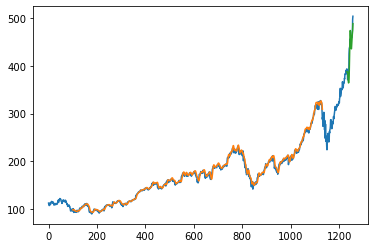

In [232]:
### Plotting
# shift train predictions for plotting
look_back=100
train_predict_plot=np.empty_like(df1)
train_predict_plot[:,:]=np.nan
train_predict_plot[look_back:len(train_predict)+look_back,:]=train_predict

# shift test predictions for plotting
test_predict_plot=np.empty_like(df1)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+(look_back*2):len(df1),:]=test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [234]:
input_x=test_data[26:].reshape(1, -1)
input_x.shape

(1, 100)

In [235]:
input_t=list(input_x)
input_t=input_t[0].tolist()

In [236]:
# demonstrate prediction for next 10 days

from numpy import array

first_output=[]
n_steps=100
i=0

ptest_x=input_x 

while(i<30):
    if (len(input_t)>100):
        ptest_x=np.array(input_t[1:])
        print("{} day input {}".format(i, ptest_x))
        ptest_x=ptest_x.reshape(1,-1)
        ptest_x=ptest_x.reshape((1, n_steps, 1))
        
        ptest_y=model.predict(ptest_x, verbose=0)
        print("{} day output {}".format(i, ptest_y))
        input_t.extend(ptest_y[0].tolist())
        input_t=input_t[1:]
        first_output.extend(ptest_y.tolist())
        i=i+1
    else:
        ptest_x=ptest_x.reshape((1, n_steps,1))
        ptest_y=model.predict(ptest_x, verbose=0)
        print(ptest_y[0])
        input_t.extend(ptest_y[0].tolist())
        print(len(input_t))
        first_output.extend(ptest_y.tolist())
        i=i+1
        
    print(first_output)
    
        

[1.0013068]
101
[[1.0013067722320557]]
1 day input [0.36570723 0.41668886 0.40932969 0.42540367 0.43005156 0.44278487
 0.47619163 0.46984919 0.47532015 0.46590331 0.45169334 0.43097146
 0.44968409 0.44709385 0.46631485 0.466799   0.45568762 0.47783776
 0.49253189 0.4810816  0.49098259 0.50163403 0.50906582 0.51659445
 0.53206323 0.54387664 0.53516183 0.5260597  0.53063497 0.52620494
 0.5437556  0.53934978 0.55409233 0.54833087 0.55326926 0.54804038
 0.55138105 0.55171996 0.55096952 0.56043477 0.56404173 0.56835072
 0.56157254 0.5837953  0.58854003 0.61403084 0.63545474 0.59444673
 0.60146699 0.61161006 0.63361495 0.63242877 0.63276768 0.62790191
 0.65005205 0.66859522 0.65293277 0.6645041  0.63736716 0.65709652
 0.66440727 0.66273693 0.66273693 0.68631533 0.68350723 0.7045196
 0.70848968 0.7101116  0.70582682 0.72112615 0.72758963 0.71594568
 0.71405747 0.7337142  0.72056937 0.72320802 0.680336   0.67810889
 0.69936333 0.68428188 0.70159045 0.71272604 0.81023506 0.83616161
 0.84320608 

10 day output [[1.17977]]
[[1.0013067722320557], [1.034361481666565], [1.0606515407562256], [1.0822944641113281], [1.1009628772735596], [1.1174229383468628], [1.1319904327392578], [1.1449640989303589], [1.1568107604980469], [1.168168067932129], [1.1797699928283691]]
11 day input [0.45169334 0.43097146 0.44968409 0.44709385 0.46631485 0.466799
 0.45568762 0.47783776 0.49253189 0.4810816  0.49098259 0.50163403
 0.50906582 0.51659445 0.53206323 0.54387664 0.53516183 0.5260597
 0.53063497 0.52620494 0.5437556  0.53934978 0.55409233 0.54833087
 0.55326926 0.54804038 0.55138105 0.55171996 0.55096952 0.56043477
 0.56404173 0.56835072 0.56157254 0.5837953  0.58854003 0.61403084
 0.63545474 0.59444673 0.60146699 0.61161006 0.63361495 0.63242877
 0.63276768 0.62790191 0.65005205 0.66859522 0.65293277 0.6645041
 0.63736716 0.65709652 0.66440727 0.66273693 0.66273693 0.68631533
 0.68350723 0.7045196  0.70848968 0.7101116  0.70582682 0.72112615
 0.72758963 0.71594568 0.71405747 0.7337142  0.7205693

20 day output [[1.4111416]]
[[1.0013067722320557], [1.034361481666565], [1.0606515407562256], [1.0822944641113281], [1.1009628772735596], [1.1174229383468628], [1.1319904327392578], [1.1449640989303589], [1.1568107604980469], [1.168168067932129], [1.1797699928283691], [1.1923606395721436], [1.2066175937652588], [1.2230943441390991], [1.2421802282333374], [1.2640804052352905], [1.2888145446777344], [1.316227912902832], [1.346025824546814], [1.3778116703033447], [1.4111416339874268]]
21 day input [0.49098259 0.50163403 0.50906582 0.51659445 0.53206323 0.54387664
 0.53516183 0.5260597  0.53063497 0.52620494 0.5437556  0.53934978
 0.55409233 0.54833087 0.55326926 0.54804038 0.55138105 0.55171996
 0.55096952 0.56043477 0.56404173 0.56835072 0.56157254 0.5837953
 0.58854003 0.61403084 0.63545474 0.59444673 0.60146699 0.61161006
 0.63361495 0.63242877 0.63276768 0.62790191 0.65005205 0.66859522
 0.65293277 0.6645041  0.63736716 0.65709652 0.66440727 0.66273693
 0.66273693 0.68631533 0.6835072

25 day output [[1.5879773]]
[[1.0013067722320557], [1.034361481666565], [1.0606515407562256], [1.0822944641113281], [1.1009628772735596], [1.1174229383468628], [1.1319904327392578], [1.1449640989303589], [1.1568107604980469], [1.168168067932129], [1.1797699928283691], [1.1923606395721436], [1.2066175937652588], [1.2230943441390991], [1.2421802282333374], [1.2640804052352905], [1.2888145446777344], [1.316227912902832], [1.346025824546814], [1.3778116703033447], [1.4111416339874268], [1.445572018623352], [1.4807119369506836], [1.516260027885437], [1.5520342588424683], [1.5879772901535034]]
26 day input [0.54387664 0.53516183 0.5260597  0.53063497 0.52620494 0.5437556
 0.53934978 0.55409233 0.54833087 0.55326926 0.54804038 0.55138105
 0.55171996 0.55096952 0.56043477 0.56404173 0.56835072 0.56157254
 0.5837953  0.58854003 0.61403084 0.63545474 0.59444673 0.60146699
 0.61161006 0.63361495 0.63242877 0.63276768 0.62790191 0.65005205
 0.66859522 0.65293277 0.6645041  0.63736716 0.65709652 0.

In [237]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [238]:
import matplotlib.pyplot as plt

In [239]:
df1.shape

(1257, 1)

In [240]:
first_output

[[1.0013067722320557],
 [1.034361481666565],
 [1.0606515407562256],
 [1.0822944641113281],
 [1.1009628772735596],
 [1.1174229383468628],
 [1.1319904327392578],
 [1.1449640989303589],
 [1.1568107604980469],
 [1.168168067932129],
 [1.1797699928283691],
 [1.1923606395721436],
 [1.2066175937652588],
 [1.2230943441390991],
 [1.2421802282333374],
 [1.2640804052352905],
 [1.2888145446777344],
 [1.316227912902832],
 [1.346025824546814],
 [1.3778116703033447],
 [1.4111416339874268],
 [1.445572018623352],
 [1.4807119369506836],
 [1.516260027885437],
 [1.5520342588424683],
 [1.5879772901535034],
 [1.6241514682769775],
 [1.6607121229171753],
 [1.6978683471679688],
 [1.7358357906341553]]

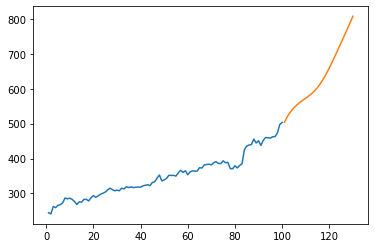

In [241]:
plt.plot(day_new, scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred, scaler.inverse_transform(first_output))

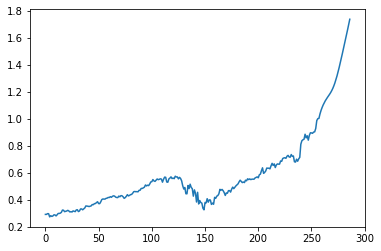

In [242]:
df3=df1.tolist()
df3.extend(first_output)
plt.plot(df3[1000:])

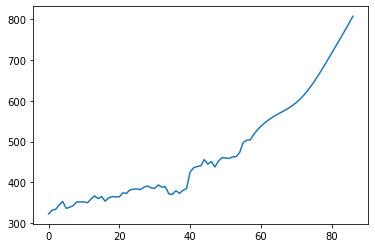

In [243]:
plt.plot(scaler.inverse_transform(df3[1200:]))